In [85]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# using SMOTE with gbl SMOTE >> 21 ACCuracy 

In [312]:


# dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake0/'
# df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
data =pd.read_csv('/content/sample_data/train.csv')
classes=(data.groupby('y').count()).index.tolist()




In [259]:
classes

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [260]:
data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

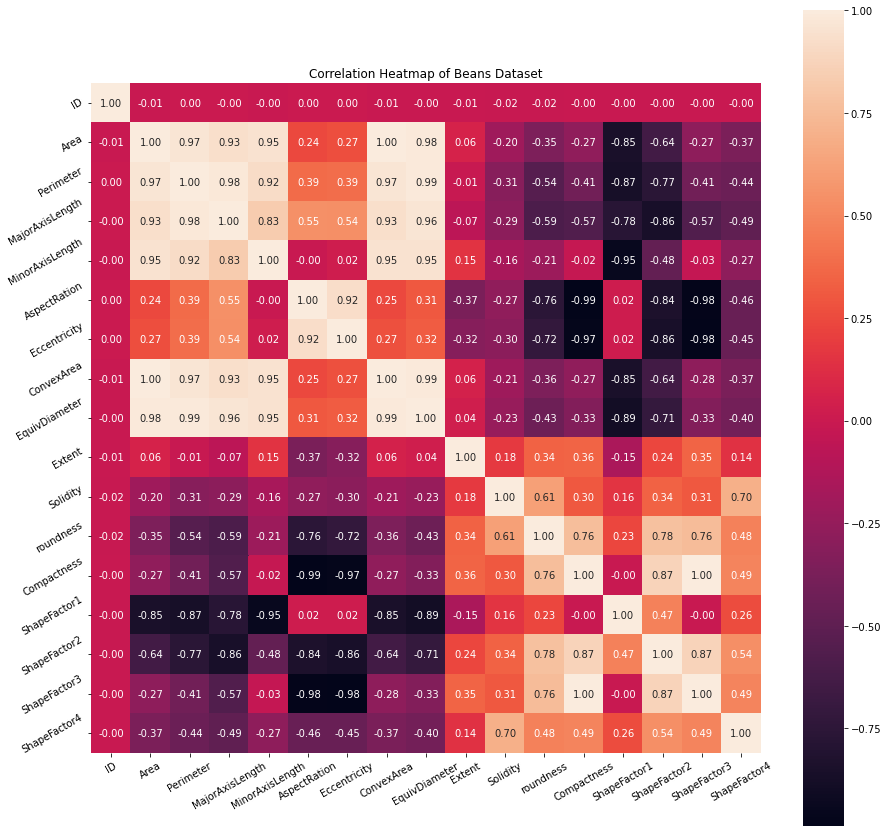

In [262]:
corr_matrix = data.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [263]:
SIRA = data[data.y == 'SIRA']
DERMASON = data[data.y == 'DERMASON']
BARBUNYA = data[data.y == 'BARBUNYA']
BOMBAY = data[data.y == 'BOMBAY']
CALI = data[data.y == 'CALI']
HOROZ = data[data.y == 'HOROZ']
SEKER = data[data.y == 'SEKER']

no null values 

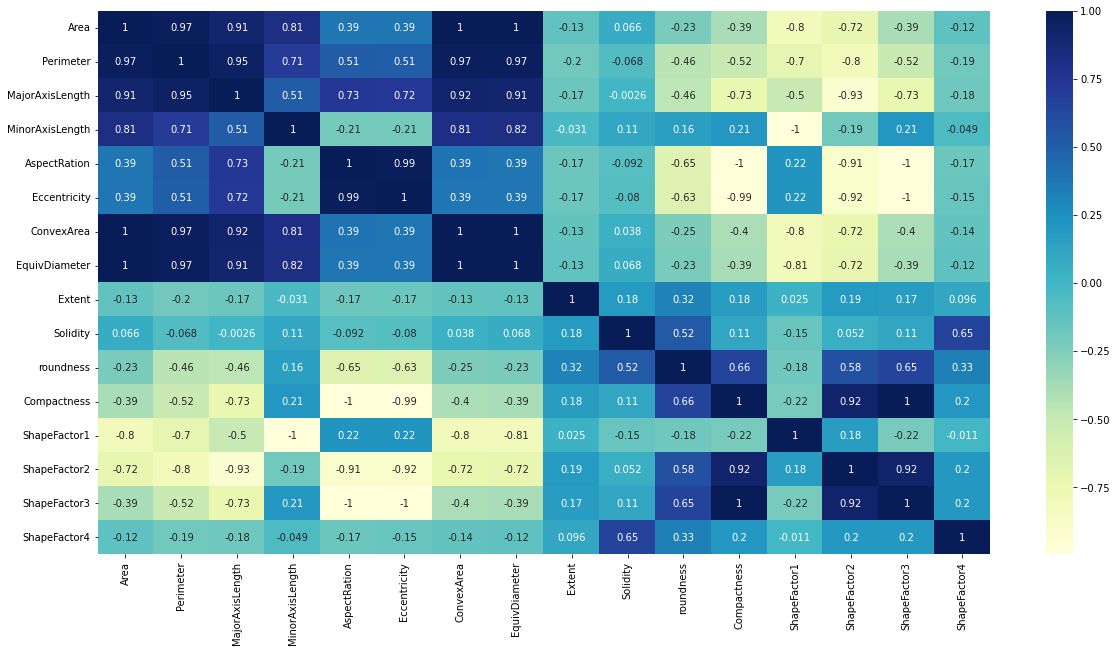

In [264]:
# SIRA correlation
plt.figure(figsize=(20,10))
dataplot = sns.heatmap(SIRA.drop(columns='ID').corr(), cmap="YlGnBu", annot=True)

# Check the data is balanced or not ? 


**[recommend this article to understand data balance ](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)**

In [265]:
data['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


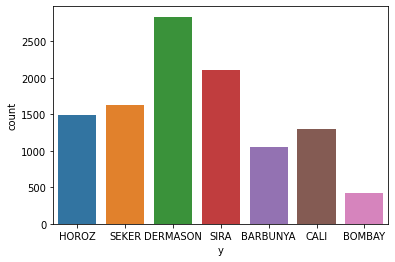

In [266]:
g = sns.countplot(data['y'])
plt.show()

## we can see that there is a  difference between the  classes in the data set data set.

In [267]:
X_data =  data.drop('y' , axis=1)
y_data = data["y"]

In [340]:
# import library
from collections import Counter
from imblearn.over_sampling import SMOTE

# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = smote.fit_resample(X_data, y_data)
# print(sorted(Counter(y_resampled).items()))

smote = SMOTE()
# fit predictor and target variable
X_resampled, y_resampled = smote.fit_resample(X_data, y_data)
# from collections import Counter
print(sorted(Counter(y_resampled).items()))






[('BARBUNYA', 2837), ('BOMBAY', 2837), ('CALI', 2837), ('DERMASON', 2837), ('HOROZ', 2837), ('SEKER', 2837), ('SIRA', 2837)]


In [341]:
y_resampled=pd.DataFrame(y_resampled)
y_resampled.head()

,y
0,HOROZ
1,SEKER
2,DERMASON
3,DERMASON
4,SIRA


In [342]:
data_balanced = pd.concat([X_resampled , y_resampled] , axis=1)
data_balanced.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [343]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19859 entries, 0 to 19858
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               19859 non-null  int64  
 1   Area             19859 non-null  int64  
 2   Perimeter        19859 non-null  float64
 3   MajorAxisLength  19859 non-null  float64
 4   MinorAxisLength  19859 non-null  float64
 5   AspectRation     19859 non-null  float64
 6   Eccentricity     19859 non-null  float64
 7   ConvexArea       19859 non-null  int64  
 8   EquivDiameter    19859 non-null  float64
 9   Extent           19859 non-null  float64
 10  Solidity         19859 non-null  float64
 11  roundness        19859 non-null  float64
 12  Compactness      19859 non-null  float64
 13  ShapeFactor1     19859 non-null  float64
 14  ShapeFactor2     19859 non-null  float64
 15  ShapeFactor3     19859 non-null  float64
 16  ShapeFactor4     19859 non-null  float64
 17  y           

### Now My data is balanced 



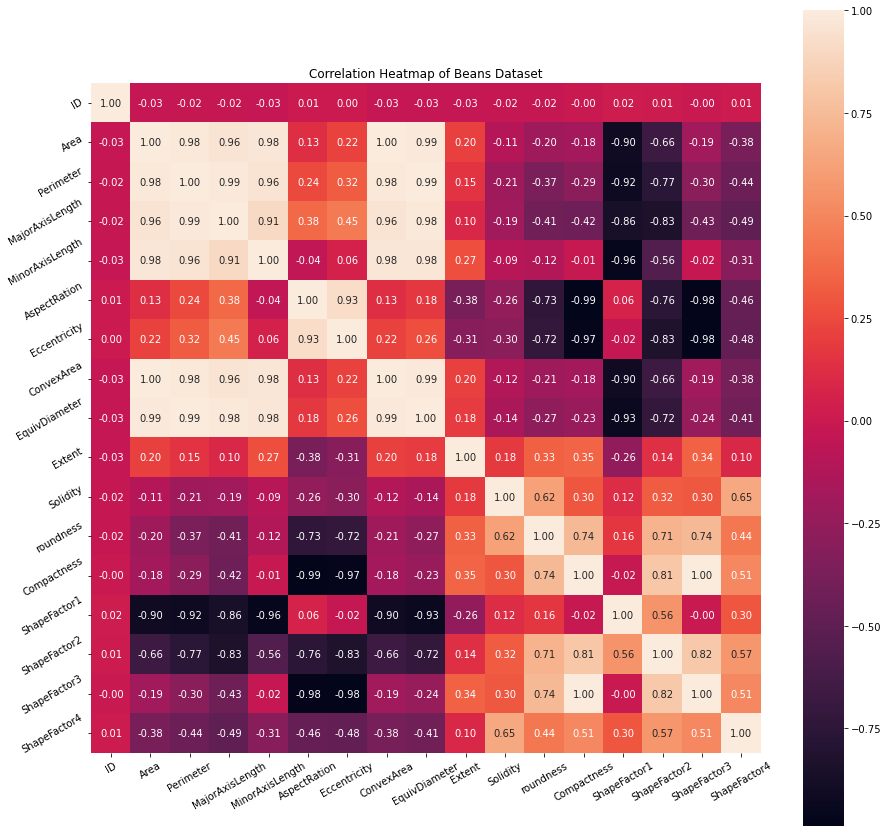

In [272]:
corr_matrix = data_balanced.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [273]:
sorted_mat = corr_matrix.unstack().sort_values()
print(sorted_mat)

Compactness      AspectRation      -0.987695
AspectRation     Compactness       -0.987695
Eccentricity     ShapeFactor3      -0.982293
ShapeFactor3     Eccentricity      -0.982293
                 AspectRation      -0.978740
                                      ...   
MajorAxisLength  MajorAxisLength    1.000000
Perimeter        Perimeter          1.000000
Area             Area               1.000000
ShapeFactor3     ShapeFactor3       1.000000
ShapeFactor4     ShapeFactor4       1.000000
Length: 289, dtype: float64


#pla

In [274]:
# # Create correlation matrix

# corr_matrix = data_balanced.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find index of feature columns with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [275]:
print((data_balanced.corr() > 0.85).sum().sort_values())

ID                 1
ShapeFactor2       1
ShapeFactor1       1
roundness          1
Solidity           1
Extent             1
ShapeFactor4       1
ShapeFactor3       2
AspectRation       2
Compactness        2
Eccentricity       2
ConvexArea         6
MinorAxisLength    6
MajorAxisLength    6
Perimeter          6
Area               6
EquivDiameter      6
dtype: int64


In [276]:
# data_balanced = data_balanced.drop(data_balanced[to_drop], axis=1)

In [348]:
data_balanced=data_balanced.drop("ID" , axis=1)

# Start To Normalize data 

In [349]:
data =data_balanced.drop("y", axis=1 )
y = data_balanced["y"]


In [350]:
y=pd.DataFrame(y, columns=['y'])

In [351]:
y.shape

(19859, 1)

In [352]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data , columns= data.columns)
scaled_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.161480,0.305642,0.384688,0.178526,0.806323,0.962493,0.157859,0.272126,0.159036,0.904445,0.570991,0.117547,0.563053,0.117763,0.095822,0.978144
1,0.102884,0.159315,0.147660,0.262615,0.158649,0.541875,0.099333,0.188244,0.696185,0.992108,0.967937,0.734115,0.441765,0.584350,0.693236,0.954606
2,0.048003,0.088228,0.101396,0.120882,0.292923,0.715573,0.046789,0.096876,0.791600,0.916611,0.880589,0.560232,0.670512,0.557595,0.508634,0.961666
3,0.078387,0.143168,0.152803,0.169553,0.317879,0.738483,0.076363,0.149359,0.678145,0.925168,0.827875,0.533333,0.577583,0.464513,0.481208,0.990730
4,0.094408,0.171504,0.175795,0.198104,0.315547,0.736430,0.092111,0.175090,0.561313,0.917125,0.796852,0.532649,0.533480,0.434817,0.480514,0.938025


In [353]:
scaled_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.161480,0.305642,0.384688,0.178526,0.806323,0.962493,0.157859,0.272126,0.159036,0.904445,0.570991,0.117547,0.563053,0.117763,0.095822,0.978144
1,0.102884,0.159315,0.147660,0.262615,0.158649,0.541875,0.099333,0.188244,0.696185,0.992108,0.967937,0.734115,0.441765,0.584350,0.693236,0.954606
2,0.048003,0.088228,0.101396,0.120882,0.292923,0.715573,0.046789,0.096876,0.791600,0.916611,0.880589,0.560232,0.670512,0.557595,0.508634,0.961666
3,0.078387,0.143168,0.152803,0.169553,0.317879,0.738483,0.076363,0.149359,0.678145,0.925168,0.827875,0.533333,0.577583,0.464513,0.481208,0.990730
4,0.094408,0.171504,0.175795,0.198104,0.315547,0.736430,0.092111,0.175090,0.561313,0.917125,0.796852,0.532649,0.533480,0.434817,0.480514,0.938025


# Apply PCA on correlated features 

In [354]:
pca = PCA(n_components=1)
pca1 = pca.fit_transform(scaled_data[['Perimeter','Area','ConvexArea','EquivDiameter']])
pca1 = pd.DataFrame(pca1)

In [355]:
pca1.head()

,0
0,-0.066059
1,-0.240595
2,-0.376383
3,-0.292123
4,-0.248953


In [356]:

pca2 = pca.fit_transform(scaled_data[["ShapeFactor3", "Eccentricity", "Compactness", "AspectRation" ]])
pca2 = pd.DataFrame(pca2)
pca3 = pca.fit_transform(scaled_data[["ShapeFactor1", "MinorAxisLength"]])
pca3= pd.DataFrame(pca3)

In [357]:
cols = ['Perimeter','Area','ConvexArea','EquivDiameter' ,"ShapeFactor3", "Eccentricity", "Compactness", "AspectRation" , "ShapeFactor1", "MinorAxisLength"]

In [358]:
scaled_datav2=scaled_data.drop(['Perimeter','Area','ConvexArea','EquivDiameter' ,"ShapeFactor3", "Eccentricity", "Compactness", "AspectRation" , "ShapeFactor1", "MinorAxisLength"] , axis=1 )

In [359]:
scaled_datav2.head()

,MajorAxisLength,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,0.384688,0.159036,0.904445,0.570991,0.117763,0.978144
1,0.147660,0.696185,0.992108,0.967937,0.584350,0.954606
2,0.101396,0.791600,0.916611,0.880589,0.557595,0.961666
3,0.152803,0.678145,0.925168,0.827875,0.464513,0.990730
4,0.175795,0.561313,0.917125,0.796852,0.434817,0.938025


In [360]:

scaled_datav3=pd.concat([scaled_datav2 , pca1 , pca2 , pca3] , axis = 1)

In [361]:
scaled_datav3.head()

,MajorAxisLength,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4,0,0,0
0,0.384688,0.159036,0.904445,0.570991,0.117763,0.978144,-0.066059,-0.605306,-0.171444
1,0.147660,0.696185,0.992108,0.967937,0.584350,0.954606,-0.240595,0.548608,-0.027240
2,0.101396,0.791600,0.916611,0.880589,0.557595,0.961666,-0.376383,0.219125,-0.286873
3,0.152803,0.678145,0.925168,0.827875,0.464513,0.990730,-0.292123,0.168058,-0.187914
4,0.175795,0.561313,0.917125,0.796852,0.434817,0.938025,-0.248953,0.169358,-0.136960


In [327]:
scaled_datav3.shape

(10834, 10)

# End of PCA on Data

# New Section

In [292]:
# X_data = data_balanced.drop("y" , axis=1)
# y_data =pd.DataFrame(data_balanced['y'])

In [293]:
# !pip install fast_ml --upgrade

# from fast_ml.model_development import train_valid_test_split


In [362]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( scaled_datav3, y , test_size=0.20, random_state= 42 , stratify=y )
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (15887, 9) (15887, 1)
Test set: (3972, 9) (3972, 1)


###  Training different models on our dataset

We'll train six models:
- Logistic regression (perceptron)
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- GradientBoostingClassifier
-  AdaBoostClassifier

In [363]:
from scipy.sparse.construct import random
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier  # Accuracy =  0.9307798800184587
from sklearn.ensemble import RandomForestClassifier #Accuracy =  0.9312413474850023
from sklearn.ensemble import HistGradientBoostingClassifier #Accuracy =  0.930318412551915

from sklearn.ensemble import GradientBoostingClassifier #Accuracy =  0.9293954776188279
from sklearn.ensemble import BaggingClassifier#Accuracy =  0.9164743885556068


from sklearn.neighbors import KNeighborsClassifier #bad
from sklearn.ensemble import ExtraTreesClassifier #Accuracy =  0.9307798800184587
from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm

from sklearn.metrics import classification_report, accuracy_score



# ExtraTreesClassifier 

In [366]:
ex_model =ExtraTreesClassifier(random_state=42).fit(X_train, y_train)

pred = ex_model.predict(X_test)

print("ExtraTreesClassifier Train set Accuracy: ", accuracy_score(y_train, ex_model.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, pred))

print("classification_report metric :")
print(classification_report(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


ExtraTreesClassifier Train set Accuracy:  1.0
Test set Accuracy:  0.9541792547834844
classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.96      0.96       567
      BOMBAY       1.00      1.00      1.00       567
        CALI       0.96      0.96      0.96       567
    DERMASON       0.92      0.92      0.92       568
       HOROZ       0.97      0.97      0.97       568
       SEKER       0.97      0.96      0.97       567
        SIRA       0.90      0.90      0.90       568

    accuracy                           0.95      3972
   macro avg       0.95      0.95      0.95      3972
weighted avg       0.95      0.95      0.95      3972



In [367]:
print(confusion_matrix(y_test,pred))

[[544   0  18   0   1   2   2]
 [  0 567   0   0   0   0   0]
 [ 10   0 546   0   9   0   2]
 [  0   0   0 521   2  12  33]
 [  1   0   3   2 552   0  10]
 [  2   0   0   6   0 547  12]
 [  4   0   1  40   5   5 513]]


In [376]:
ex_model1 =ExtraTreesClassifier(random_state=42)

cross_val = cross_val_score(ex_model1, data_balanced.drop("y", axis=1) , y ,  cv=5)
print(cross_val)
print(cross_val.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

[0.943857   0.94536757 0.95367573 0.96299094 0.96524805]
0.9542278574042472


# LogisticRegression

In [377]:

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
pred1 = lr_model.predict(X_test)

print("LogisticRegression Train set Accuracy: ", accuracy_score(y_train, lr_model.predict(X_train)))
print("LogisticRegression Test set Accuracy: ", accuracy_score(y_test, pred1))

print("classification_report metric :")
print(classification_report(y_test,pred1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression Train set Accuracy:  0.9379366777868697
LogisticRegression Test set Accuracy:  0.9332829808660624
classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       567
      BOMBAY       1.00      1.00      1.00       567
        CALI       0.93      0.95      0.94       567
    DERMASON       0.90      0.88      0.89       568
       HOROZ       0.96      0.97      0.97       568
       SEKER       0.95      0.95      0.95       567
        SIRA       0.85      0.88      0.86       568

    accuracy                           0.93      3972
   macro avg       0.93      0.93      0.93      3972
weighted avg       0.93      0.93      0.93      3972



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarn

# DecisionTreeClassifier

In [378]:

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

pred2 = dt_model.predict(X_test)

print("\n DecisionTreeClassifier Train set Accuracy: ", accuracy_score(y_train, dt_model.predict(X_train)))
print("\n DecisionTreeClassifier Test set Accuracy: ", accuracy_score(y_test, pred2))

print("\nclassification_report metric :")
print(classification_report(y_test,pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,



 DecisionTreeClassifier Train set Accuracy:  1.0

 DecisionTreeClassifier Test set Accuracy:  0.9317724068479355

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.96      0.95       567
      BOMBAY       1.00      1.00      1.00       567
        CALI       0.95      0.94      0.94       567
    DERMASON       0.87      0.88      0.88       568
       HOROZ       0.95      0.95      0.95       568
       SEKER       0.95      0.96      0.95       567
        SIRA       0.87      0.83      0.85       568

    accuracy                           0.93      3972
   macro avg       0.93      0.93      0.93      3972
weighted avg       0.93      0.93      0.93      3972



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# SVC

In [379]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
pred3 = svm_model.predict(X_test)

print("\n SVC Train set Accuracy: ", accuracy_score(y_train, svm_model.predict(X_train)))
print("\n SVC Test set Accuracy: ", accuracy_score(y_test, pred3))

print("\nclassification_report metric :")
print(classification_report(y_test,pred3)) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,



 SVC Train set Accuracy:  0.9429092969094228

 SVC Test set Accuracy:  0.9383182275931521

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       567
      BOMBAY       1.00      1.00      1.00       567
        CALI       0.93      0.95      0.94       567
    DERMASON       0.90      0.89      0.90       568
       HOROZ       0.97      0.97      0.97       568
       SEKER       0.96      0.95      0.95       567
        SIRA       0.86      0.90      0.88       568

    accuracy                           0.94      3972
   macro avg       0.94      0.94      0.94      3972
weighted avg       0.94      0.94      0.94      3972



# RandomForestClassifier

In [380]:


from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

pred4 = rf_model.predict(X_test)

print("\n RandomForestClassifier Train set Accuracy: ", accuracy_score(y_train, rf_model.predict(X_train)))
print("\n RandomForestClassifier Test set Accuracy: ", accuracy_score(y_test, pred4))

print("\nclassification_report metric :")
print(classification_report(y_test,pred4)) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,



 RandomForestClassifier Train set Accuracy:  1.0

 RandomForestClassifier Test set Accuracy:  0.9504028197381672

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.95      0.96       567
      BOMBAY       1.00      1.00      1.00       567
        CALI       0.95      0.96      0.96       567
    DERMASON       0.91      0.92      0.91       568
       HOROZ       0.97      0.97      0.97       568
       SEKER       0.97      0.96      0.96       567
        SIRA       0.90      0.89      0.89       568

    accuracy                           0.95      3972
   macro avg       0.95      0.95      0.95      3972
weighted avg       0.95      0.95      0.95      3972



# GradientBoostingClassifier

In [386]:


from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=.2 ,   max_depth=10)
gb_model.fit(X_train, y_train)


pred5 = gb_model.predict(X_test)

print("\n GradientBoostingClassifier Train set Accuracy: ", accuracy_score(y_train, gb_model.predict(X_train)))
print("\n GradientBoostingClassifier Test set Accuracy: ", accuracy_score(y_test, pred5))

print("\nclassification_report metric :")
print(classification_report(y_test,pred5)) 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,



 GradientBoostingClassifier Train set Accuracy:  1.0

 GradientBoostingClassifier Test set Accuracy:  0.9481369587109768

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.95      0.96       567
      BOMBAY       1.00      1.00      1.00       567
        CALI       0.96      0.96      0.96       567
    DERMASON       0.90      0.91      0.90       568
       HOROZ       0.97      0.97      0.97       568
       SEKER       0.96      0.96      0.96       567
        SIRA       0.88      0.89      0.88       568

    accuracy                           0.95      3972
   macro avg       0.95      0.95      0.95      3972
weighted avg       0.95      0.95      0.95      3972



In [382]:
print(confusion_matrix(y_test,pred5))


[[540   0  19   0   2   3   3]
 [  0 567   0   0   0   0   0]
 [  7   0 548   0   9   0   3]
 [  0   0   0 517   1  11  39]
 [  1   0   3   2 552   0  10]
 [  3   0   0   8   0 543  13]
 [  1   0   1  51   5   5 505]]


# AdaBoostClassifier

In [383]:


from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier()
ab_model.fit(X_train, y_train)


pred6 = ab_model.predict(X_test)

print("\n AdaBoostClassifier Train set Accuracy: ", accuracy_score(y_train, ab_model.predict(X_train)))
print("\n AdaBoostClassifier Test set Accuracy: ", accuracy_score(y_test, pred6))

print("\nclassification_report metric :")
print(classification_report(y_test,pred6)) 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,



 AdaBoostClassifier Train set Accuracy:  0.7841002077170013

 AdaBoostClassifier Test set Accuracy:  0.7789526686807654

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.82      0.02      0.05       567
      BOMBAY       1.00      1.00      1.00       567
        CALI       0.51      0.92      0.65       567
    DERMASON       0.91      0.78      0.84       568
       HOROZ       0.96      0.91      0.94       568
       SEKER       0.92      0.90      0.91       567
        SIRA       0.67      0.92      0.78       568

    accuracy                           0.78      3972
   macro avg       0.83      0.78      0.74      3972
weighted avg       0.83      0.78      0.74      3972





```
`# This is formatted as code`
```

# LGBMClassifier

In [387]:
LGBM = LGBMClassifier(learning_rate=0.19,max_depth=6,n_estimators=120,reg_lambda=0.25,num_leaves = 46,class_weight ='balanced').fit(X_train,y_train)
pred7 = LGBM.predict(X_test)

print("\n LGBMClassifier Train set Accuracy: ", accuracy_score(y_train, LGBM.predict(X_train)))
print("\n LGBMClassifier Test set Accuracy: ", accuracy_score(y_test, pred7))
# learning_rate=0.19,max_depth=6,n_estimators=120,reg_lambda=0.25 0.9659281638133602
# reg_alpha=0.01,reg_lambda=0.01
print("\nclassification_report metric :")
print(classification_report(y_test,pred7)) 


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 LGBMClassifier Train set Accuracy:  0.999370554541449

 LGBMClassifier Test set Accuracy:  0.9493957703927492

classification_report metric :
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.95      0.97       567
      BOMBAY       1.00      1.00      1.00       567
        CALI       0.96      0.97      0.96       567
    DERMASON       0.90      0.90      0.90       568
       HOROZ       0.97      0.97      0.97       568
       SEKER       0.97      0.96      0.96       567
        SIRA       0.88      0.89      0.88       568

    accuracy                           0.95      3972
   macro avg       0.95      0.95      0.95      3972
weighted avg       0.95      0.95      0.95      3972



In [390]:

print(confusion_matrix(y_test,pred7))


[[541   0  19   0   2   1   4]
 [  0 567   0   0   0   0   0]
 [  6   0 550   0   8   0   3]
 [  0   0   0 514   1  11  42]
 [  1   0   4   2 551   0  10]
 [  3   0   0   9   0 543  12]
 [  2   0   1  47   7   6 505]]


# pla

In [389]:
# from imblearn.ensemble import BalancedBaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# #Create an instance
# classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
#                                 sampling_strategy='auto',
#                                 replacement=False,
#                                 random_state=42)
# classifier.fit(X_train,y_train)

# preds = classifier.predict(X_test)

In [307]:
# cross_val = cross_val_score(LGBM,X_test,y_test,  cv=5)
# print(cross_val)
# print(cross_val.mean())



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[0.95471698 0.93459119 0.93324937 0.93073048 0.94710327]
0.9400782599052644


# Testing part 

In [404]:
test_data = pd.read_csv("/content/sample_data/test.csv")
# test_data.info()
test_data.head()



,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [405]:

scaler = MinMaxScaler()
test_ = scaler.fit_transform(test_data.drop("ID" , axis=1))

test_ = pd.DataFrame(test_ , columns= test_data.columns.difference(["ID"]))

test_.head()


,Area,AspectRation,Compactness,ConvexArea,Eccentricity,EquivDiameter,Extent,MajorAxisLength,MinorAxisLength,Perimeter,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Solidity,roundness
0,0.176284,0.326010,0.384512,0.219474,0.671244,0.923647,0.185606,0.286877,0.174218,0.283799,0.532371,0.170609,0.514391,0.137476,0.140861,0.259451
1,0.039066,0.079952,0.086840,0.109856,0.290223,0.704878,0.039146,0.077894,0.720788,0.870792,0.816468,0.561899,0.679714,0.625947,0.510147,0.964772
2,0.162119,0.292393,0.235638,0.307641,0.235157,0.643529,0.165189,0.268226,0.666956,0.694580,0.615819,0.626656,0.374121,0.445200,0.577471,0.917530
3,0.020326,0.040547,0.057033,0.074849,0.296222,0.710795,0.020257,0.042153,0.530918,0.880329,0.872610,0.555630,0.762320,0.683242,0.503723,0.977656
4,0.576207,0.687380,0.643315,0.664518,0.342004,0.751899,0.579292,0.691524,0.859266,0.859997,0.714562,0.495637,0.120230,0.134543,0.443083,0.841017


In [406]:
pca = PCA(n_components=1)
pca1 = pca.fit_transform(test_[['Perimeter','Area','ConvexArea','EquivDiameter']])
pca1 = pd.DataFrame(pca1)
pca2 = pca.fit_transform(test_[["ShapeFactor3", "Eccentricity", "Compactness", "AspectRation" ]])
pca2 = pd.DataFrame(pca2)
pca3 = pca.fit_transform(test_[["ShapeFactor1", "MinorAxisLength"]])
pca3= pd.DataFrame(pca3)

In [407]:
test_v2=test_.drop(['Perimeter','Area','ConvexArea','EquivDiameter' ,"ShapeFactor3", "Eccentricity", "Compactness", "AspectRation" , "ShapeFactor1", "MinorAxisLength"] , axis=1 )
test_v2=pd.concat([test_v2 , pca1 , pca2 , pca3] , axis = 1)

In [408]:
test_v2.head()

,Extent,MajorAxisLength,ShapeFactor2,ShapeFactor4,Solidity,roundness,0,0,0
0,0.185606,0.286877,0.170609,0.137476,0.140861,0.259451,0.133245,0.214117,0.514252
1,0.039146,0.077894,0.561899,0.625947,0.510147,0.964772,-0.175455,-0.313648,-0.101570
2,0.165189,0.268226,0.626656,0.445200,0.577471,0.917530,0.045590,0.008658,0.042325
3,0.020257,0.042153,0.555630,0.683242,0.503723,0.977656,-0.210781,-0.387459,0.037713
4,0.579292,0.691524,0.495637,0.134543,0.443083,0.841017,0.572135,0.625465,-0.173764


In [409]:
y_test_predicted = rf_model.predict(test_v2)


test_data['y'] = y_test_predicted

test_data['y'] = test_data['y'].astype('object') 

test_data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,BOMBAY
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,BARBUNYA
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


In [410]:
test_data[['ID','y']].to_csv('result1.csv', index=False)

In [411]:
sub =pd.read_csv("/content/result1.csv")

In [412]:
sub[0:50]

,ID,y
0,10834,BOMBAY
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,BARBUNYA
4,10838,BOMBAY
5,10839,BARBUNYA
6,10840,BARBUNYA
7,10841,SIRA
8,10842,BARBUNYA
9,10843,SIRA
